In [27]:
#@title Librerias utiles $\checkmark$
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import quad
from scipy import special 
from astropy import units as u
from astropy import constants as C
from tqdm.auto import tqdm

from MACHOS_FY import rE, r, rho, rho_2, integrand

#Event rate de Kim Griest $\checkmark$



In [28]:
print(1/365,1e-0)
print(1/365,1e-1)

0.0027397260273972603 1.0
0.0027397260273972603 0.1


In [29]:
t_s = np.linspace(1/365, 5.7*1200/365 ,1200)
t_s = np.logspace(-4, 2 ,100)

I = np.zeros(len(t_s))
J = np.zeros(len(t_s))
K = np.zeros(len(t_s))
m = [1e0, 1e-1, 1e-3]

for i in tqdm(range(len(t_s))):
    I_k = integrate.fixed_quad(lambda x: integrand(x,t_s[i],m[0]), 0, 1, n=1000)
    J_k = integrate.fixed_quad(lambda x: integrand(x,t_s[i],m[1]), 0, 1, n=1000)
    K_k = integrate.fixed_quad(lambda x: integrand(x,t_s[i],m[2]), 0, 1, n=1000)
    I[i]=I_k[0]
    J[i]=J_k[0]
    K[i]=K_k[0]


  0%|          | 0/100 [00:00<?, ?it/s]

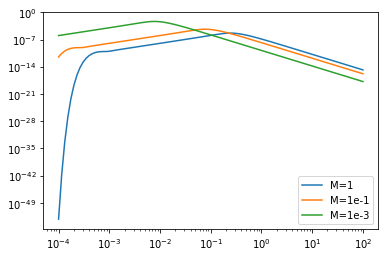

In [30]:

plt.loglog(t_s,I,'-',label='M=1')
plt.loglog(t_s,J,'-',label='M=1e-1')
plt.loglog(t_s,K,'-',label='M=1e-3')
plt.legend(loc='best')


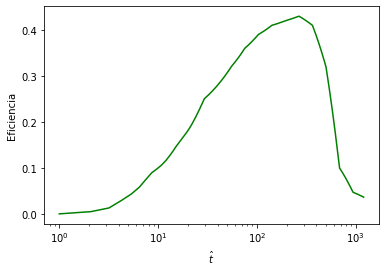

In [31]:
from eficiencia import eficy, funcion

eficiencia = []
hat_t = np.linspace(1, 1200, 1100) # esto se lo doy en dias

for t in hat_t:
    eficiencia.append(eficy(t))

plt.ylabel('Eficiencia')    
plt.xlabel('$\hat{t}$')
plt.semilogx(hat_t, eficiencia,'green')

#Numero esperado de eventos

In [32]:

# plt.figure(99)
# plt.ylim(1e-10,10)

# tE2 = np.linspace(1,1200,1200)
# print(tE2[-1])

# plt.loglog(tE2, funcion(tE2), '-', lw=2, label='Eficiencia')
# plt.loglog(tE2, I,'-',color='navy',alpha = 0.7,lw=2, label = 'Tasa de eventos')
# plt.loglog(tE2, I*funcion(tE2),'-',color='crimson',alpha = 0.7,lw=2, label = r'Tasa de eventos $\times$ eficiencia')
# plt.legend(loc='best')
# plt.xlabel(r'$\hat{t}$',fontsize= 20)
# plt.ylabel(r'$\frac{d\Gamma}{d\hat{t}}$',fontsize= 20,rotation=0)
# plt.show()


Hago una funcion que genera curvas de tasa de eventos para cualquier masa, a partir de reescalear la curva asociada a la tasa de eventos de $1M_{\odot}$.


Text(0.5, 0, '$t_E$')

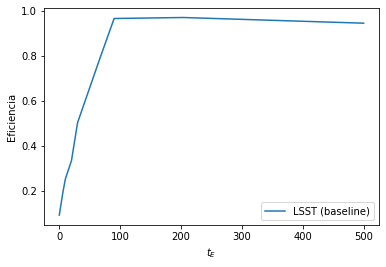

In [33]:
eff = np.array([1117., 1822., 2547., 3357., 5042., 7388., 9667., 9714., 9459.])
te = np.array([1,5,10,20,30,60,90,200,500])

# plt.plot(te,eff/10000,label='lsst eficiencia-baseline')

from scipy.interpolate import InterpolatedUnivariateSpline

tck = InterpolatedUnivariateSpline(te, eff,w=None,k=1)

x= np.linspace(0,500,1000)

def eff_lsst_01(x):
    efichi = tck(x)
    return efichi

def eff_lsst(t):
    efic = []
    for T in t:
        efic.append(float(eff_lsst_01(T))/10000)
    return efic

plt.plot(x,eff_lsst(x),label='LSST (baseline)')

# plt.semilogx(2*hat_t, eficiencia,'green', label='MACHO first Year')

plt.legend()

plt.ylabel('Eficiencia')    
plt.xlabel('$t_E$')

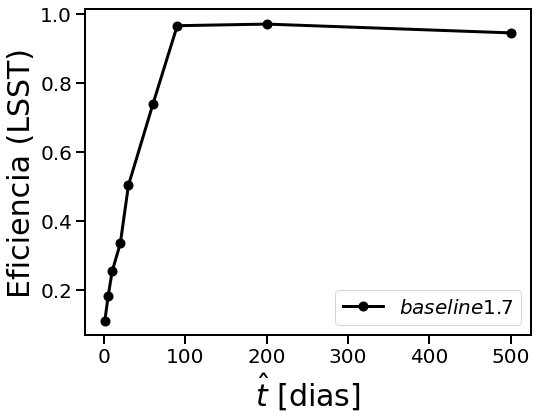

In [34]:
import matplotlib.pyplot as plt
import numpy as np
eff = np.array([1117., 1822., 2547., 3357., 5042., 7388., 9667., 9714., 9459.])
te = np.array([1,5,10,20,30,60,90,200,500])

plt.figure(figsize=(8,6))
ax= plt.axes()

plt.plot(te,eff/10000, linestyle = '-', marker='o', markersize=9,lw=3,color='black', label='$baseline1.7$')
plt.ylabel('Eficiencia (LSST)', fontsize=30)
plt.xlabel(r'$\hat{t}$ [dias]',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5, color='black')
plt.legend(loc='best',fontsize=20)

In [35]:
def tasa_eventos_rescaleo(m):
    t0_ = np.linspace(1/365,1200/365,100)
    I = []
    for i in range(len(t0_)):
        I_k = integrate.fixed_quad(lambda x: integrand(x,t0_[i],1), 0, 1,n=1000)
        I.append(I_k[0])
    I = np.array(I)
    t00 = np.linspace(1,1200,100) #dias
    t, G= np.sqrt(m/1)*t00, (1/m)*I
    return t, G


In [36]:
def tasa_eventos2(m):
    t0_ = np.linspace(1/365,1200/365,100)
#     t0_ = np.logspace(-4,2,100)
    I = []
    for i in range(len(t0_)):
        I_k = integrate.fixed_quad(lambda x: integrand(x,t0_[i],m), 0, 1,n=1000)
        I.append(I_k[0])
    I = np.array(I)
    t0 = np.linspace(1,1200,100) #dias
#     t0 = np.logspace(0,1200,100)
#     t, G= np.sqrt(m/1)*t00, (1/m)*I
    return t0, I

Ahora integro una lista de 100 masas entre $10^{-5}M_{\odot}$ y $1M_{\odot}$ de la tasa de eventos por la eficiencia $\int \frac{d\Gamma}{d\hat{t}}\mathcal{E}(\hat{t})(\hat{t})d\hat{t}$.

No obtengo el resultado del paper, pero la integral ellos la hacen de 0 a $\infty$

  0%|          | 0/100 [00:00<?, ?it/s]

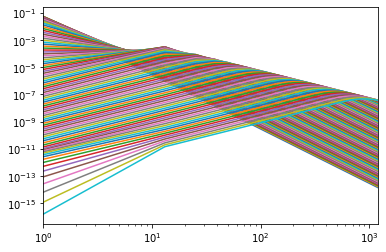

In [37]:
from scipy.integrate import simps

M = np.logspace(-5,2,100)
N = []
N_wefi = []

for i in tqdm(range(len(M))):
    t, G = tasa_eventos2(M[i])
    plt.xlim(1,1200)
    plt.loglog(t,G)
    int_G = simps(G*funcion(t),t)
    int_G2 = simps(G,t)
    N.append(int_G)
    N_wefi.append(int_G2)

np.savetxt('N_macho_1yr.txt', N)

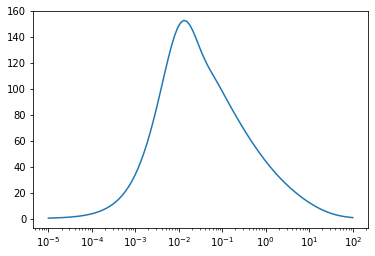

In [38]:
plt.semilogx(M, np.array(N)*2e+5, linestyle='-')

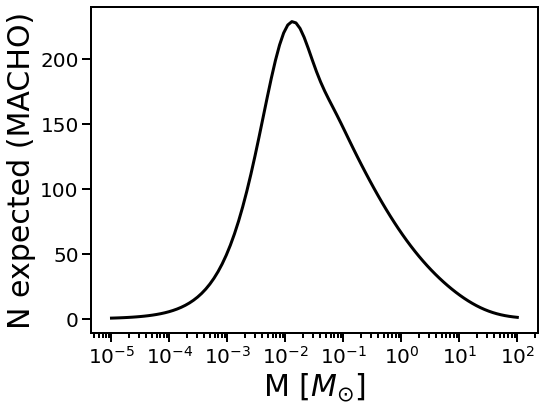

In [39]:
import pandas as pd
plt.figure(figsize=(8,6))
ax = plt.axes()

plt.xlabel(r'M $[M_{\odot}]$', fontsize=30)
plt.ylabel(r'N expected (MACHO)', fontsize=30)
plt.semilogx(M, 3e+5*np.array(N), linestyle ='-', color='black',lw=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5, color='black')

# plt.legend()

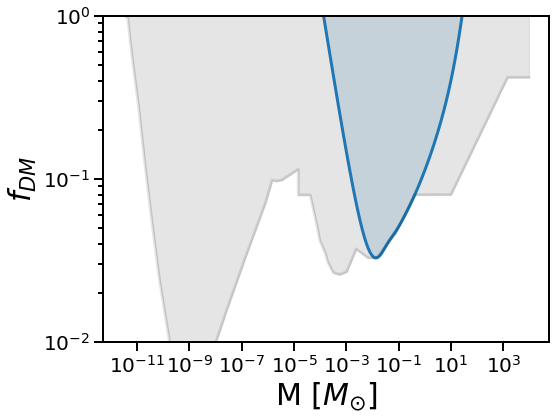

In [40]:

plt.figure(figsize=(8,6))
ax = plt.axes()
plt.ylim(1e-2,1)
plt.xlabel(r'M $[M_{\odot}]$',fontsize=30)
plt.ylabel(r'$f_{DM}$',fontsize=30)
plt.loglog(M,3/(1.2e+5*np.array(N)),lw=3)
plt.fill_between(M,3/(1.2e+5*np.array(N)),1, alpha=0.15)

b = np.loadtxt('Microlensing-copy1.txt')
plt.loglog(b[:,0],b[:,1],color='black',alpha=0.1,linestyle='-',lw=3)
plt.fill_between(b[:,0],b[:,1],1,color='black', alpha=0.1,label='Old Constraints')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5, color='black')

In [41]:

np.savetxt('N_macho_5.7yr.txt', 3e+5*np.array(N))

np.savetxt('constraints_macho.txt', 3/(1.2e+5*np.array(N)))

In [42]:
N_lsst = []

for i in tqdm(range(len(M))):
    t, G = tasa_eventos2(M[i])
    int_G = simps(G*eff_lsst(t),t)
    N_lsst.append(int_G)

  0%|          | 0/100 [00:00<?, ?it/s]

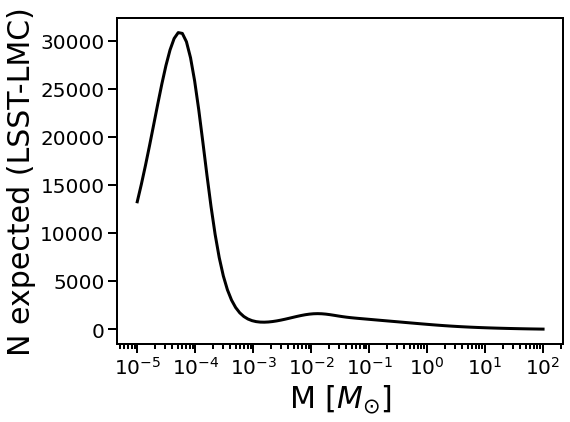

In [43]:

plt.figure(figsize=(8,6))
ax = plt.axes()
N_lsst = np.array(N_lsst)*1e6
plt.xlabel(r'M $[M_{\odot}]$', fontsize=30)
plt.ylabel(r'N expected (LSST-LMC)', fontsize=30)
plt.semilogx(M,N_lsst, linestyle ='-', color='black',lw=3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5, color='black')


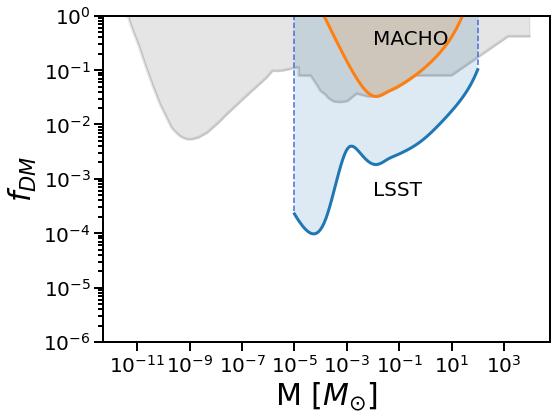

In [44]:

plt.figure(figsize=(8,6))
ax = plt.axes()
plt.ylim(1e-6,1)
plt.xlabel(r'M $[M_{\odot}]$',fontsize=30)
plt.ylabel(r'$f_{DM}$',fontsize=30)
plt.loglog(M,3/(N_lsst),lw=3)
plt.fill_between(M,3/(np.array(N_lsst)),1, alpha=0.15)

b = np.loadtxt('Microlensing-copy1.txt')
plt.loglog(b[:,0],b[:,1],color='black',alpha=0.1,linestyle='-',lw=3)
plt.fill_between(b[:,0],b[:,1],1,color='black', alpha=0.1,label='Old Constraints')

plt.loglog(M,3/(1.2e+5*np.array(N)),lw=3)
plt.fill_between(M,3/(1.2e+5*np.array(N)),1, alpha=0.15)
plt.axvline(x=1e-5,ymin=0.4,ymax=1,linestyle='--',color='royalblue')
plt.axvline(x=10e1,ymin=0.85,ymax=1,linestyle='--',color='royalblue')

plt.text(1e-2, 3e-1, 'MACHO', fontsize=20)
plt.text(1e-2, 5e-4, 'LSST', fontsize=20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5, color='black')